<a href="https://colab.research.google.com/github/DkMaria/Fake-News-Detection/blob/main/tf_idf_multinomialNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

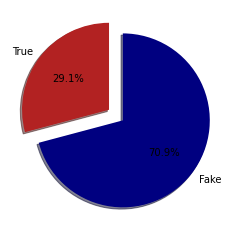

In [ ]:
# read csv files which contains all TRUE and all FALSE claims
true = pd.read_csv('/content/drive/MyDrive/true28.csv')
df_true = pd.DataFrame(true, columns=['headline', 'text', 'keywords', 'ratingName'])
df_true['label'] = 0


false = pd.read_csv('/content/drive/MyDrive/false05.csv')
df_false = pd.DataFrame(false, columns=['headline', 'text', 'keywords', 'ratingName'])
df_false['label'] = 1

data = pd.concat([df_true, df_false])
labels = data['label']
# 1: 10000
# 0: 4113

# check if the dataset is well balanced
label_size = [4113, 10000]
plt.pie(label_size, explode=[0.1, 0.1], colors=['firebrick', 'navy'], startangle=90, shadow=True,
        labels=['True', 'Fake'], autopct='%1.1f%%')
plt.show()

# shuffle the dataset
data = data.sample(frac=1)
# print(data.head(20))

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

In [ ]:
'''In this machine learning project, we built a classifier model using the supervised machine learning algorithm 
   to verify if the information is false (fake). We applied the supervised Multinomial Naive Bayes algorithm in 
   python fake news detection.'''


def clean_data(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    token = text.split()
    token = [lemmatizer.lemmatize(word) for word in token if not word in stopwords]
    clean_news = ' '.join(token)

    return clean_news


data['text'] = data['text'].astype(str) # AttributeError: 'float' object has no attribute 'lower'
data['text'] = data['text'].apply(lambda x: clean_data(x))

vectorizer = TfidfVectorizer(max_features=50000, lowercase=False, ngram_range=(1, 2))



In [ ]:
df_false.head()

headline  ... label
0                        Who Stripped Jessica Rabbit  ...     1
1         Translation of Turkish Airline Regulations  ...     1
2  The health care law a ""job killer""? The evid...  ...     1
3  FALSE: Trump Supporters Misspelled His Name wi...  ...     1
4                   Tom Daschle Pledge of Allegiance  ...     1

[5 rows x 5 columns]

In [ ]:
from wordcloud import WordCloud
#Word Cloud for False News
text = ''
for news in df_false.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [ ]:
#WordCloud For True News
text = ''
for news in df_true.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [ ]:
from collections import Counter
print(Counter(data['ratingName'].values))

# class count
true_count, false_count = data['label'].value_counts()

# Separate class
true = data[data['label'] == 0] #true claims
false = data[data['label'] == 1]# print the shape of the class #false claims
print('true 0:', true.shape)
print('false 1:', false.shape)


'''Undersampling can be defined as removing some observations of the majority class. This is done until the majority and 
minority class is balanced out'''
false_under = false.sample(false_count)
#print(class_1_under)

test_under = pd.concat([false_under, true], axis=0)

print("total class of 1 and 0:",test_under['label'].value_counts())# plot the count after under-sampeling
test_under['label'].value_counts().plot(kind='bar', title='count (target)')

Counter({False: 10000, True: 4113})
true 0: (4113, 5)
false 1: (10000, 5)
total class of 1 and 0: 1    4113
0    4113
Name: label, dtype: int64


In [ ]:
target = test_under['label']
data = test_under.sample(frac=1)

In [ ]:
#x_train, X_test, y_train, y_test = train_test_split(test_under['text'], target, test_size =0.20, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(test_under['text'], target, test_size=0.20, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size =0.10, random_state=42)
train_X, X_val, train_y, y_val = train_test_split(train_X, train_y, test_size =0.10, random_state=42)
print('Size training set: ',len(train_X))
print('Size validation set: ', len(X_val))
print('Size test set: ', len(test_X))

Size training set:  5922
Size validation set:  658
Size test set:  1646


In [ ]:
# Convert the text data into vectors using the vectorizer defined above and convert them to pandas DataFrames
vec_train = vectorizer.fit_transform(train_X)
vec_train = vec_train.toarray()

vec_test = vectorizer.transform(test_X).toarray()

train_data = pd.DataFrame(vec_train, columns=vectorizer.get_feature_names_out())
test_data = pd.DataFrame(vec_test, columns=vectorizer.get_feature_names_out())

In [ ]:
# apply the Multinomial Naive Bayes algorithm to our dataset

'''Multinomial Naive Bayes algorithm is generally the Naive Bayes algorithm applied to multinomial 
   distribution data. The multinomial distribution means that with each trial there can be k >= 2 
   outcomes. This supervised classification algorithm is suitable for classifying discrete data like 
   word counts of text. This algorithm is chosen for fake news detection project because the Multinomial
   NB algorithm works pretty well with high-dimensional data. Also, the algorithm works well with text 
   data.'''

clf = MultinomialNB()

#  train the fake news detection model using the fit function and record the predictions made by the classifier
history = clf.fit(train_data, train_y)
predictions = clf.predict(test_data)

# classification report for our model
target_names = ['real_news', 'fake_news']
print(classification_report(test_y, predictions, zero_division=1, target_names = target_names))

print("**********")

# accuracy score of our model
print(accuracy_score(test_y, predictions))

              precision    recall  f1-score   support

   real_news       0.63      0.67      0.65       816
   fake_news       0.65      0.61      0.63       830

    accuracy                           0.64      1646
   macro avg       0.64      0.64      0.64      1646
weighted avg       0.64      0.64      0.64      1646

**********
0.6415552855407047


In [ ]:
import numpy as np

def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 5)]:
        print(line)
        t = line.split()
        print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')


ClassificationReport = classification_report(test_y, predictions, zero_division=1, target_names = target_names)
plot_classification_report(ClassificationReport)

   real_news       0.63      0.67      0.65       816
['real_news', '0.63', '0.67', '0.65', '816']
[0.63, 0.67, 0.65]
   fake_news       0.65      0.61      0.63       830
['fake_news', '0.65', '0.61', '0.63', '830']
[0.65, 0.61, 0.63]
